### 加载数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dframe=pd.DataFrame

ns=10
ori_data=dict()
mod_data=dict()


def subjectCounter(i):
    return 'subject0{}'.format(i)

for i in range(1,ns):
    data_path='D:/Desktop/bcidatasetIV2a/A{:02d}T.npz'.format(i)
    subj=subjectCounter(i)

    ori_data[subj]=np.load(data_path)
    mod_data[subj] = {}
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']
    
    #移除三个眼电电极
    mod_data[subj]['raw_EEG'] = np.delete(mod_data[subj]['raw_EEG'], np.s_[22:], 1)
    #mod_data为修改后的数据

In [3]:
for i in range(1,ns):
    data_path='D:/Desktop/bcidatasetIV2a/A{:02d}T.npz'.format(i)
    subject='subject{:02d}'.format(i)

    ori_data[subject]=np.load(data_path)
    #origin_data为源数据

In [4]:
print(type(ori_data['subject01']))
print(ori_data['subject01'].files)

<class 'numpy.lib.npyio.NpzFile'>
['s', 'etyp', 'epos', 'edur', 'artifacts']


In [5]:
ori_data['subject01']['artifacts'].ravel()[20:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [6]:
#初始化mod_data中的subject0X
for i in range(1,ns):
    subj=subjectCounter(i)
    mod_data[subj]={}

In [7]:
print('Sample\tElectrodes')
for i in range(1, ns):
    subj_temp = subjectCounter(i)
    print(ori_data[subj_temp]['s'].shape)

Sample	Electrodes
(672528, 25)
(677169, 25)
(660530, 25)
(600915, 25)
(686120, 25)
(678980, 25)
(681071, 25)
(675270, 25)
(673328, 25)


In [8]:
for i in range(1, ns):
    subj = subjectCounter(i)
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']

In [9]:
pd.DataFrame(mod_data['subject01']['raw_EEG']).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734,31.738281,-13.671875,-43.945312
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844,22.460938,-13.183594,-40.527344
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375,33.691406,-8.300781,-38.574219
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922,41.992188,-7.324219,-38.574219
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203,37.109375,-15.136719,-49.804688


### 预处理

In [10]:
#去除眼电信号
for i in range(1,ns):
    subj=subjectCounter(i)
    mod_data[subj]['raw_EEG']=np.delete(mod_data[subj]['raw_EEG'],np.s_[22:],1)

In [11]:
#带通滤波
from scipy.signal import butter,lfilter
from scipy.signal import freqz

In [12]:
#巴特沃斯滤波器设计
def butter_bandpass_filter(signal,lowcut,highcut,fs,order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal, axis=-1)
    
    return y

In [13]:
#滤波
for i in range(1,ns):
    subj=subjectCounter(i)

    mod_data[subj]['raw_EEG']=mod_data[subj]['raw_EEG'].T
    print(mod_data[subj]['raw_EEG'].shape)

(22, 672528)
(22, 677169)
(22, 660530)
(22, 600915)
(22, 686120)
(22, 678980)
(22, 681071)
(22, 675270)
(22, 673328)


In [14]:
for i in range(1,ns):
    mod_data

In [15]:
def butter_bandpass_one_subject(data, subj, lowcut, highcut, fs, interval=None):
    print('Processing ', subj)
    
    # Create new key 'EEG_filtered' to store filtered EEG of each subject
    data[subj]['EEG_filtered'] = {}
    
    # Current raw EEG
    temp_raw_EEG = data[subj]['raw_EEG']
    
    if interval is not None:
        startband = np.arange(lowcut, highcut, step = interval)
        
        for start in startband:
            # This will be new key inside the EEG_filtered
            band = "{:02d}_{:02d}".format(start, start+interval)
            
            print('Filtering through {} Hz band'.format(band))
            # Bandpass filtering
            data[subj]['EEG_filtered'][band] = {}
            data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, start, start+interval, fs)
            
    else:
        # This will be new key inside the EEG_filtered
        band = "{:02d}_{:02d}".format(lowcut, highcut)
        
        data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, lowcut, highcut, fs)

In [26]:
lowcut=4
highcut=40
fs = 250

# Iterate over all subjects
for i in range(1, ns):
    subj = subjectCounter(i)
    butter_bandpass_one_subject(mod_data, subj, lowcut, highcut, fs, interval=4)
    print('')

Processing  subject01
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

Processing  subject02
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

Processing  subject03
Filtering through 04_08 Hz band
Filtering through 08_12 Hz band
Filtering through 12_16 Hz band
Filtering through 16_20 Hz band
Filtering through 20_24 Hz band
Filtering through 24_28 Hz band
Filtering through 28_32 Hz band
Filtering through 32_36 Hz band
Filtering through 36_40 Hz band

Processing  subject04
Filtering through 04_08 Hz band
Filtering thr

In [18]:
left_pos='left_pos'
right_pos='right_pos'

for i in range(1,ns):
    subj=subjectCounter(i)

    mod_data[subj][left_pos]= ori_data[subj]['epos'][ori_data[subj]['etyp'] == 769]
    mod_data[subj][right_pos] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == 770]

In [27]:
# Now take EEG data within [0.5 3.5] seconds after cue onset position of each class
start = 0.5
end = 3.5

# Key to store result
EEG_left = 'EEG_left'
EEG_right = 'EEG_right'

for i in range(1, ns):
    subj = subjectCounter(i)
    print('Processing ', subj)
    # Temporary variable of left and right pos    
    temp_pos_left = mod_data[subj][left_pos]
    temp_pos_right = mod_data[subj][right_pos]
 
    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_EEG_all = mod_data[subj]['EEG_filtered'][band]['EEG_all']
        temp_EEG_left = []
        temp_EEG_right = []
        
        # LEFT
        for j in range(len(temp_pos_left)):
            temp_EEG_left.append(temp_EEG_all[:, temp_pos_left[j] + int(start*fs) : temp_pos_left[j] + int(end*fs)])
        mod_data[subj]['EEG_filtered'][band]['EEG_left'] = np.array(temp_EEG_left)
        
        # RIGHT
        for j in range(len(temp_pos_right)):
            temp_EEG_right.append(temp_EEG_all[:, temp_pos_right[j] + int(start*fs) : temp_pos_right[j] + int(end*fs)])
        mod_data[subj]['EEG_filtered'][band]['EEG_right'] = np.array(temp_EEG_right)

Processing  subject01
Processing  subject02
Processing  subject03
Processing  subject04
Processing  subject05
Processing  subject06
Processing  subject07
Processing  subject08
Processing  subject09


In [28]:
#数据分割
def split_EEG_one_class(EEG_one_class,percent_train=0.8):
    n=EEG_one_class.shape[0]

    n_tr=round(n*percent_train)#训练样本
    n_te=n-n_tr#测试样本

    EEG_train=EEG_one_class[:n_tr]
    EEG_test=EEG_one_class[n_tr:n_te+n_tr]

    return EEG_train,EEG_test

In [29]:
for i in range(1, ns):
    
    subj = subjectCounter(i)
    
    # Iterate over all bands
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        # Temporary variable for left and right class of each band
        temp_EEG_left = mod_data[subj]['EEG_filtered'][band]['EEG_left']
        temp_EEG_right = mod_data[subj]['EEG_filtered'][band]['EEG_right']

        # Temporary variable to access each band
        temp_filt = mod_data[subj]['EEG_filtered'][band]
        
        temp_filt['EEG_left_train'], temp_filt['EEG_left_test'] = split_EEG_one_class(temp_EEG_left, 0.8)
        temp_filt['EEG_right_train'], temp_filt['EEG_right_test'] = split_EEG_one_class(temp_EEG_right, 0.8)  

In [30]:
mod_data['subject01']['EEG_filtered']['04_08'].keys()

dict_keys(['EEG_all', 'EEG_left', 'EEG_right', 'EEG_left_train', 'EEG_left_test', 'EEG_right_train', 'EEG_right_test'])

### CSP滤波

In [38]:
for i in range(1,ns):
    subj=subjectCounter(i)

    mod_data[subj]['CSP']={}

In [36]:
#计算协方差和复合协方差
def compute_cov(EEG_data):
    cov=[]
    for i in range(EEG_data.shape[0]):
        cov.append(EEG_data[i]@EEG_data[i].T/np.trace(EEG_data[i]@EEG_data[i].T))
    
    cov=np.mean(np.array(cov),0)

    return cov

In [39]:
for i in range(1,ns):
    
    subj = subjectCounter(i)
    
    # Iterate over all bands
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        # New key to store result
        temp_band = mod_data[subj]['CSP'][band] = {}
        
        # Compute left and right covariance
        # LEFT
        temp_band['cov_left'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_left_train'])
        
        # RIGHT
        temp_band['cov_right'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_right_train'])
        
        # Add covariance of left and right class as composite covariance
        temp_band['cov_comp'] = temp_band['cov_left'] + temp_band['cov_right']

In [40]:
temp1 = mod_data['subject03']['CSP']['04_08']['cov_left']
temp2 = mod_data['subject03']['CSP']['04_08']['cov_right']
temp3 = mod_data['subject03']['CSP']['04_08']['cov_comp']

In [50]:
#white matrix
for i in range(1,ns):#创建一个白化项
    subj=subjectCounter(i)
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['CSP'][band]['whitening']={}

from scipy.linalg import sqrtm  #平方根
from scipy.linalg import inv   #求逆

def decompose_cov(avg_cov):#将每个被试的一类平均协方差矩阵分解,倒序排列
    λ, V = np.linalg.eig(avg_cov)
    λ_dsc = np.sort(λ)[::-1] 
    idx_dsc = np.argsort(λ)[::-1] 
    V_dsc = V[:, idx_dsc] 
    λ_dsc = np.diag(λ_dsc) 
    return λ_dsc,V_dsc

def white_matrix(λ_dsc,V_dsc):
    λ_dsc_sqr=sqrtm(inv(λ_dsc))
    P=(λ_dsc_sqr)@(V_dsc.T)
    return P

for i in range(1,ns):
    subj = subjectCounter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        temp_whitening = mod_data[subj]['CSP'][band]['whitening']

        temp_cov = mod_data[subj]['CSP'][band]['cov_comp']

        # Decomposing composite covariance into eigenvector and eigenvalue
        temp_whitening['eigval'], temp_whitening['eigvec'] = decompose_cov(temp_cov)

        # White matrix
        temp_whitening['P'] = white_matrix(temp_whitening['eigval'], temp_whitening['eigvec'])

In [51]:
#计算特征向量
for i in range(1, ns):
    subj = subjectCounter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['CSP'][band]['S_left'] = {}
        mod_data[subj]['CSP'][band]['S_right'] = {} 

def compute_S(avg_Cov,white):
    
    S=white@avg_Cov@white.T
    return S

def decompose_S(S_one_class, order='descending'):
    
    λ, B = np.linalg.eig(S_one_class)
    
  
    if order == 'ascending':
        idx = λ.argsort() #倒序
    elif order == 'descending':
        idx = λ.argsort()[::-1]
    else:
        print('Wrong order input')
    
    λ = λ[idx]
    B = B[:, idx]
    
    return B, λ 

#遍历全部被试
for i in range(1, ns):
    subj = subjectCounter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
      
        temp_P = mod_data[subj]['CSP'][band]['whitening']['P']
        Cl = mod_data[subj]['CSP'][band]['cov_left']
        Cr = mod_data[subj]['CSP'][band]['cov_right']

        
        temp_Sl = mod_data[subj]['CSP'][band]['S_left']
        temp_Sr = mod_data[subj]['CSP'][band]['S_right']

        # LEFT
        Sl = compute_S(Cl, temp_P)
        temp_Sl['eigvec'], temp_Sl['eigval'] = decompose_S(Sl, 'descending')

        # RIGHT
        Sr = compute_S(Cr, temp_P)
        temp_Sr['eigvec'], temp_Sr['eigval'] = decompose_S(Sr, 'ascending')


In [55]:
def spatial_filter(B,P):
    return (B.T@P)

for i in range(1,ns):
    subj=subjectCounter(i)

    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_eigv=mod_data[subj]["CSP"][band]['S_left']['eigvec']
        temp_P=mod_data[subj]['CSP'][band]['whitening']['P']

        mod_data[subj]['CSP'][band]['W']=spatial_filter(temp_eigv,temp_P)


In [56]:
temp=mod_data['subject01']['CSP'][band]["W"]
dframe(temp).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-2.067070,-1.795517,0.674657,-0.600279,-0.531707,0.051805,-3.608875,13.728214,2.541841,-10.669084,...,-0.425582,-2.234119,-5.843472,-1.293616,10.676630,-10.946518,5.049042,-13.617283,8.553094,1.837880
1,3.211127,3.787021,2.845078,-10.448529,5.912025,4.520385,-0.201067,-3.131450,2.107776,3.001354,...,0.554703,-4.511235,-3.368763,9.981609,-0.044675,1.422170,6.427704,-6.862532,-3.545508,2.428964
2,0.552975,-2.063569,8.071851,-6.107381,-4.715290,-1.655538,0.547787,2.839704,-4.037424,-0.650903,...,-1.897266,-5.762726,3.309403,7.634191,-16.817554,9.931688,1.589882,-2.605074,-5.322589,3.264397
3,0.916960,3.301811,-1.701912,-7.291251,8.600569,-1.170277,4.354018,-4.512817,-8.844287,11.326760,...,-3.514433,-1.926884,8.258898,-7.649393,5.699625,7.526022,4.220684,0.045373,-3.332242,-2.371642
4,4.530817,-4.483058,0.696202,-1.169662,-9.148161,1.393574,-1.243655,7.320753,-6.916603,12.311359,...,2.384958,-3.037356,13.978873,-14.547555,7.692809,-3.559007,-2.550236,-0.107876,-6.187102,4.079949


In [57]:
#特征训练
for i in range(1, ns):
    subj = subjectCounter(i)
    mod_data[subj]['train'] = {}
    mod_data[subj]['test'] = {}
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['train'][band] = {}
        mod_data[subj]['test'][band] = {}   

In [59]:
def compute_Z(W, E, m=2):
  
    Z = []
    
    W = np.delete(W, np.s_[m:-m:], 0)
    
    for i in range(E.shape[0]):
        Z.append(W @ E[i])
    
    return np.array(Z)

In [60]:
def feature_vector(Z):
    feature=[]
    for i in range(Z.shape[0]):
        var=np.var(Z[i],ddof=1,axis=1)
        varsum=np.sum(var)
        feature.append(np.log10(var/varsum))

    return np.array(feature)

In [63]:
for i in range(1, ns):
    subj = subjectCounter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_W = mod_data[subj]['CSP'][band]['W']
        temp_EEG_left = mod_data[subj]['EEG_filtered'][band]['EEG_left_train']
        temp_EEG_right = mod_data[subj]['EEG_filtered'][band]['EEG_right_train']

        # LEFT
        mod_data[subj]['train'][band]['Z_left'] = compute_Z(temp_W, temp_EEG_left, m=2)
        mod_data[subj]['train'][band]['feat_left'] = feature_vector(mod_data[subj]['train'][band]['Z_left'])

        left_label = np.zeros([len(mod_data[subj]['train'][band]['feat_left']), 1])
        
        # RIGHT
        mod_data[subj]['train'][band]['Z_right'] = compute_Z(temp_W, temp_EEG_right, m=2)
        mod_data[subj]['train'][band]['feat_right'] = feature_vector(mod_data[subj]['train'][band]['Z_right'])
        
        right_label = np.ones([len(mod_data[subj]['train'][band]['feat_right']), 1])
        
        left  = np.c_[mod_data[subj]['train'][band]['feat_left'], left_label]
        right  = np.c_[mod_data[subj]['train'][band]['feat_right'], right_label] 
        
        mod_data[subj]['train'][band]['feat_train'] = np.vstack([left, right])
        
        np.random.shuffle(mod_data[subj]['train'][band]['feat_train'])

In [65]:
for i in range(1, ns):
    subj = subjectCounter(i)
    m=2
    feat_left_all = []
    feat_right_all = []
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        # Access LEFT each band
        feat_left = mod_data[subj]['train'][band]['feat_left']

        feat_left_all.append(feat_left)
        
        # Access RIGHT each band
        feat_right = mod_data[subj]['train'][band]['feat_right']

        feat_right_all.append(feat_right)        
        
    # MERGING (Need to find more efficient method)
    # LEFT
    merge_left = np.zeros(feat_left_all[0].shape)

    for i in feat_left_all:
        merge_left = np.concatenate([merge_left, i], axis=1)
    
    # Delete initial zeros
    merge_left = np.delete(merge_left, np.s_[:2*m], axis=1)
    
    # RIGHT
    merge_right = np.zeros(feat_right_all[0].shape)

    for i in feat_right_all:
        merge_right = np.concatenate([merge_right, i], axis=1)
    
    # Delete initial zeros
    merge_right = np.delete(merge_right, np.s_[:2*m], axis=1)
    
    # TRUE LABEL
    true_left = np.zeros([merge_left.shape[0], 1])
    true_right = np.ones([merge_right.shape[0], 1])
    
    # FEATURE + TRUE LABEL
    left = np.hstack([merge_left, true_left])
    right = np.hstack([merge_right, true_right])    
    
    # MERGE LEFT AND RIGHT
    train_feat = np.vstack([left, right])
    
    np.random.shuffle(train_feat)
    
    mod_data[subj]['train']['all_band'] = train_feat

In [66]:
assert (mod_data['subject01']['train']['all_band'].shape == (116, 9*2*m + 1))

In [67]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [68]:
for i in range(1, ns):
    subj = subjectCounter(i)
    
    X_train = mod_data[subj]['train']['all_band'][:, :-1]
    y_train = mod_data[subj]['train']['all_band'][:, -1]
    
    # New dictionary to store result
    mod_data[subj]['train']['mutual'] = {}
    
    select = SelectKBest(mutual_info_classif, k = 4).fit(X_train, y_train)# 使用互信息最大的四个特征
    mod_data[subj]['train']['mutual']['X'] = X_train[:, select.get_support()]
    mod_data[subj]['train']['mutual']['y'] = y_train    

In [69]:
np.random.seed(42)

for i in range(1, ns):
    subj = subjectCounter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_W = mod_data[subj]['CSP'][band]['W']
        temp_EEG_left = mod_data[subj]['EEG_filtered'][band]['EEG_left_test']
        temp_EEG_right = mod_data[subj]['EEG_filtered'][band]['EEG_right_test']

        # LEFT
        mod_data[subj]['test'][band]['Z_left'] = compute_Z(temp_W, temp_EEG_left, m)
        mod_data[subj]['test'][band]['feat_left'] = feature_vector(mod_data[subj]['test'][band]['Z_left'])

        left_label = np.zeros([len(mod_data[subj]['test'][band]['feat_left']), 1])
        
        # RIGHT
        mod_data[subj]['test'][band]['Z_right'] = compute_Z(temp_W, temp_EEG_right, m)
        mod_data[subj]['test'][band]['feat_right'] = feature_vector(mod_data[subj]['test'][band]['Z_right'])
                          
        right_label = np.ones([len(mod_data[subj]['test'][band]['feat_right']), 1])

      
        left  = np.c_[mod_data[subj]['test'][band]['feat_left'], left_label]
        right  = np.c_[mod_data[subj]['test'][band]['feat_right'], right_label] 
        
        mod_data[subj]['test'][band]['feat_test'] = np.vstack([left, right])
        
        np.random.shuffle(mod_data[subj]['test'][band]['feat_test'])

In [70]:
for i in range(1, ns):
    subj = subjectCounter(i)
    
    feat_left_all = []
    feat_right_all = []
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        # Access LEFT each band
        feat_left = mod_data[subj]['test'][band]['feat_left']

        feat_left_all.append(feat_left)
        
        # Access RIGHT each band
        feat_right = mod_data[subj]['test'][band]['feat_right']

        feat_right_all.append(feat_right)        
        
    
    # LEFT
    merge_left = np.zeros(feat_left_all[0].shape)

    for i in feat_left_all:
        merge_left = np.concatenate([merge_left, i], axis=1)
    
    # Delete initial zeros
    merge_left = np.delete(merge_left, np.s_[:2*m], axis=1)
    
    # RIGHT
    merge_right = np.zeros(feat_right_all[0].shape)

    for i in feat_right_all:
        merge_right = np.concatenate([merge_right, i], axis=1)
    
    # Delete initial zeros
    merge_right = np.delete(merge_right, np.s_[:2*m], axis=1)
    
    # TRUE LABEL
    true_left = np.zeros([merge_left.shape[0], 1])
    true_right = np.ones([merge_right.shape[0], 1])
    
    # FEATURE + TRUE LABEL
    left = np.hstack([merge_left, true_left])
    right = np.hstack([merge_right, true_right])    
    
    # MERGE LEFT AND RIGHT
    test_feat = np.vstack([left, right])
    
    np.random.shuffle(test_feat)
    
    mod_data[subj]['test']['all_band'] = test_feat

In [71]:
for i in range(1, ns):
    subj = subjectCounter(i)
    
    X_test = mod_data[subj]['test']['all_band'][:, :-1]
    y_test = mod_data[subj]['test']['all_band'][:, -1]
    
    # New dictionary to store result
    mod_data[subj]['test']['mutual'] = {}
    
    # Use mutual information to find 4 most informative feature
    select = SelectKBest(mutual_info_classif, k = 4).fit(X_test, y_test)
    mod_data[subj]['test']['mutual']['X'] = X_test[:, select.get_support()]
    mod_data[subj]['test']['mutual']['y'] = y_test   

### 分类

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
model=SVC(gamma='scale')

In [74]:
##训练集性能
eval_acc=[]
eval_std=[]

for i in range(1,ns):
    subj=subjectCounter(i)
    X_train=mod_data[subj]['train']['mutual']['X']
    y_train=mod_data[subj]['train']['mutual']['y']

    eval_acc.append(cross_val_score(model,X_train,y_train,cv=10).mean()*100)
    eval_std.append(cross_val_score(model,X_train,y_train,cv=10).std()*100)

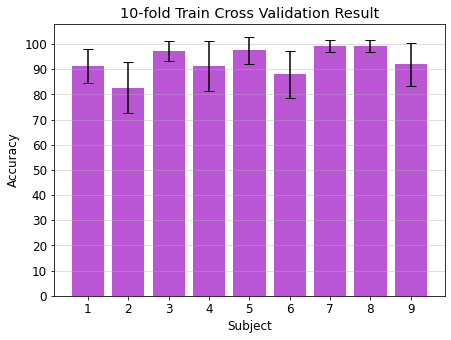

In [78]:
subject=[]
for i in range(1,ns):
    subject.append(subjectCounter(i))

fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.bar(np.arange(1, ns), eval_acc, color="#BA55D3", yerr=eval_std, capsize=5)
ax.set(xticks=np.arange(1, ns), xlabel='Subject', 
       yticks=np.arange(0, 101, step=10), ylabel='Accuracy',
       title='10-fold Train Cross Validation Result')
ax.grid(axis='y', alpha=0.5)
plt.show()


In [83]:
##测试集性能
train_score = []
test_score = []

for i in range(1, ns):
    subj = subjectCounter(i)
    
    # Prepare train and test data
    data_train = mod_data[subj]['train']['mutual']
    X_train = data_train['X']
    y_train = data_train['y']
    
    data_test = mod_data[subj]['test']['mutual']
    X_test = data_train['X']
    y_test = data_train['y']
    
    model.fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)*100
    te_score = model.score(X_test, y_test)*100
    
    train_score.append(tr_score)
    test_score.append(te_score)

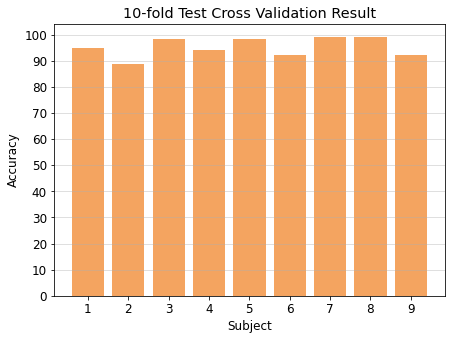

In [87]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.bar(np.arange(1,ns), test_score, color="#F4A460")
ax.set(xticks=np.arange(1,ns), xlabel='Subject', 
       yticks=np.arange(0, 101, step=10), ylabel='Accuracy',
       title='10-fold Test Cross Validation Result')
ax.grid(axis='y', alpha=0.5)
plt.show()
